# Market Value Prediction of Football Players

## Prepared by
- Doğukan Utku Kapucu, kapucu20@itu.edu.tr

## Data Set Introduction

**This data set was prepared to create a predictive model for the transfer values of football players. The dataset was taken from Kaggle. It was created from Transfermarkt data between 2021 and 2023.**

**Dataset**

**Football Players' Transfer Fee Prediction dataset estimates current market values of players based on various characteristics. Player data includes basic information such as age, height, playing position, as well as professional statistics like goal scoring, assists (in 2 seasons 2021-2022 and 2022-2023), injuries, along with total individual and team awards in their career.
<br>**

**The variables in the data set are:<br>**
1) `player`: URL link of the Transfermarkt page containing players' information <br>
2) `team`: Name of the team that player played for <br>
3) `name`: Name of player <br>
4) `position`: Position that player played most <br>
5) `height`: Height of player, cm unit <br>
6) `age`: Age of player <br>
7) `appearance`: Total number of matches played by the player <br>
8) `goals`:Number of goals scored by a player per 90 minutes played <br>
9) `assists`: Number of goal passes made by a player per 90 minutes played <br>
10) `yellow cards`: Number of yellow cards received by a player per 90 minutes played <br>
11) `second yellow cards`: Number of second yellow cards received by a player per 90 minutes played <br>
12) `red cards`: Number of red cards received by a player per 90 minutes played <br>
13) `goals conceded`: Number of goals conceded by goalkeepers per match (only goalkeepers) <br>
14) `clean sheets`: Average number of matches goalkeepers finished without conceding a goal <br>
15) `minutes played`:Total minutes played by players <br>
16) `days_injured`: Total number of days players were injured <br>
17) `games_injured`: Number of matches missed due to injuries <br>
18) `award`:Total awarđ in whole career <br>
19) `current_value`:Valuated price, Euro unit <br>
20) `highest_value`:Highest valuated price in the past, Euro unit <br>
21) `position_encoded`: 1:Goalkeeper , 2: Defender , 3:midfield , 4:Attack. (Nominal Variable) <br>
22) `winger`: 1: winger, 0: not a winger <br>

In [1]:
import pandas as pd

data = pd.read_csv("final_data.csv", sep=",")

data.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [2]:
data.shape

(10754, 22)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [4]:
data.isna().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

## Description of the Problem

**In this problem, we constructed a regression model to estimate the market value of the players by looking at many statistics and characteristics (age, goal contribution, injury history). Football teams can use this model when buying and selling players. We build Multiple Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regression, Random Forest Regression prediction Models.**

## Data Exploration

**An idea about the relationship of the features was obtained with the corr() function. This relationship was visualized with the help of heatmap() function from the seaborn library. Information about the features was obtained with the describe() function.**

In [5]:
X = data.drop(columns = ['player', 'team', 'name', 'position', 'current_value'], axis=1)
X.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,highest_value,position_encoded,winger
0,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,70000000,1,0
1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,22000000,1,0
2,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,6000000,1,0
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,2,0
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,80000000,2,0


In [6]:
y = data['current_value']
y.head()

0    15000000
1     1500000
2      600000
3    50000000
4    40000000
Name: current_value, dtype: int64

In [7]:
corr_X = X.corr()
corr_X

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,highest_value,position_encoded,winger
height,1.000000,0.063652,0.060641,-0.055962,-0.202441,-0.037974,-0.005112,-0.005693,0.333092,0.044366,0.132887,0.059392,0.054902,0.013976,0.036776,-0.378333,-0.381728
age,0.063652,1.000000,0.139846,-0.034805,-0.024156,0.007085,0.015529,0.003074,0.083343,0.039064,0.169020,0.324267,0.343029,0.363478,0.123468,-0.107469,-0.047808
appearance,0.060641,0.139846,1.000000,0.131469,0.157186,-0.023092,-0.007436,-0.024514,-0.101384,-0.032515,0.945365,0.127369,0.147528,0.222139,0.418394,0.129357,0.038713
goals,-0.055962,-0.034805,0.131469,1.000000,0.218266,-0.012826,-0.013974,-0.013940,-0.158107,-0.025811,0.050863,0.037527,0.041696,0.099617,0.129037,0.434600,-0.004581
assists,-0.202441,-0.024156,0.157186,0.218266,1.000000,-0.004430,0.019551,-0.013189,-0.180607,-0.029460,0.081136,0.039431,0.049383,0.091569,0.145407,0.324714,0.177580
yellow cards,-0.037974,0.007085,-0.023092,-0.012826,-0.004430,1.000000,0.028739,-0.003007,-0.093675,-0.017122,-0.039652,0.011461,0.012892,-0.009052,-0.009772,0.077185,0.010097
second yellow cards,-0.005112,0.015529,-0.007436,-0.013974,0.019551,0.028739,1.000000,-0.002562,-0.045840,-0.006770,-0.010411,0.003772,0.007090,-0.015231,-0.014155,0.005766,-0.007259
red cards,-0.005693,0.003074,-0.024514,-0.013940,-0.013189,-0.003007,-0.002562,1.000000,-0.004584,-0.001778,-0.024402,-0.003650,-0.004764,-0.007886,-0.007257,0.004614,-0.007026
goals conceded,0.333092,0.083343,-0.101384,-0.158107,-0.180607,-0.093675,-0.045840,-0.004584,1.000000,0.067466,-0.004267,-0.030926,-0.042140,-0.011520,-0.061183,-0.517020,-0.198351
clean sheets,0.044366,0.039064,-0.032515,-0.025811,-0.029460,-0.017122,-0.006770,-0.001778,0.067466,1.000000,-0.020190,0.001275,0.005611,0.002996,-0.008302,-0.084334,-0.032354


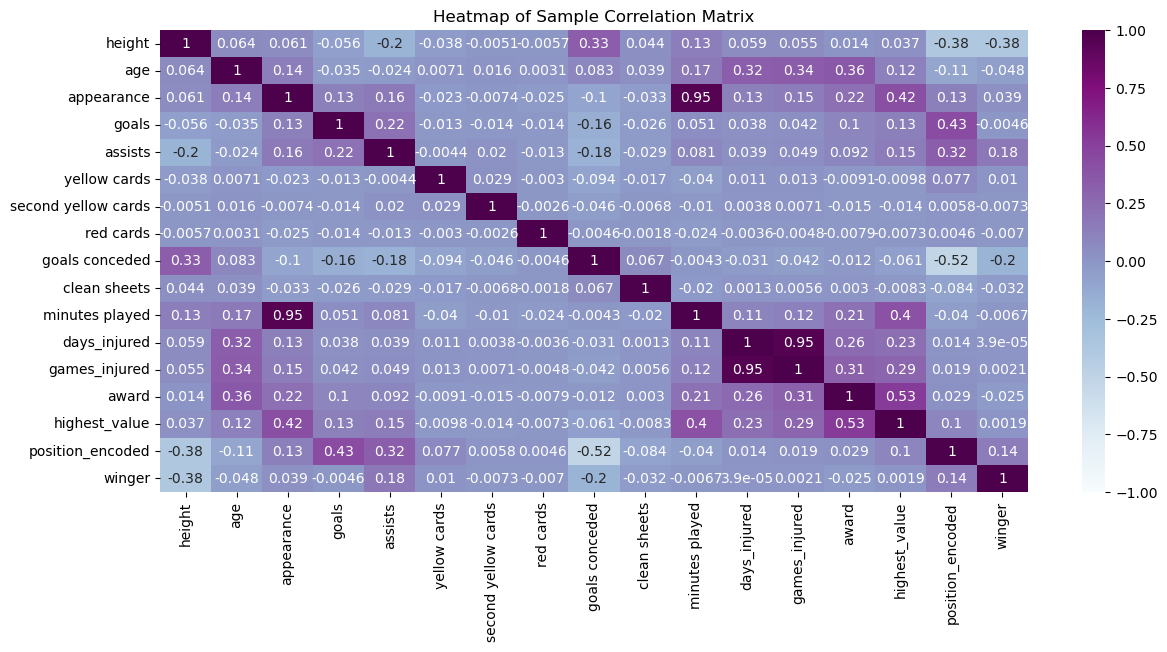

In [8]:
# Creating heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# setting figure size
plt.rcParams['figure.figsize'] = [14, 6]

sns.heatmap(corr_X, cmap="BuPu", annot=True, vmin=-1, vmax=1)
plt.title('Heatmap of Sample Correlation Matrix')
plt.show();

In [9]:
data.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


## Methodologies

**Nominal feature "position_encoded" was encoded via OneHotEncoder and other numeric features were scaled. With the help of the ColumnTransformer these two steps was chained. Since there are no missing values in the dataset, we did not need to do any imputation operations.**

**Since there are many features, feature selection was performed with SFS. After this step, the preprocessing process was completed and the model construction phase began.**

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1773)

print ('Training Set Size: %d, Test Set Size: %d \n' % (X_train.shape[0], X_test.shape[0]))

Training Set Size: 8603, Test Set Size: 2151 



In [11]:
X["position_encoded"].value_counts()

position_encoded
2    3528
3    3095
4    2902
1    1229
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder

nominal_features = ["position_encoded"]  # Nominal variable is added into a list.

nominal_transformer = OneHotEncoder(drop='first', sparse_output=False)
nominal_transformer

OneHotEncoder(drop='first', sparse_output=False)

In [13]:
from sklearn.preprocessing import StandardScaler

numeric_features = X.drop(columns = ["position_encoded"], axis=1).columns.to_list()

numeric_transformer = StandardScaler()

In [14]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[("numeric", numeric_transformer, numeric_features),
                                               ("nominal", nominal_transformer, nominal_features)])
preprocessor

ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                 ['height', 'age', 'appearance', 'goals',
                                  'assists', 'yellow cards',
                                  'second yellow cards', 'red cards',
                                  'goals conceded', 'clean sheets',
                                  'minutes played', 'days_injured',
                                  'games_injured', 'award', 'highest_value',
                                  'winger']),
                                ('nominal',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['position_encoded'])])

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

model = LinearRegression()

pipe = make_pipeline(preprocessor, SFS(model, k_features=(1, (X.shape[1] + 2)), forward=False, scoring='r2')) 
# forward=False is used to calculate the performance by removing the features one by one and whether the features will remain in the model.
                                                                            
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['height', 'age',
                                                   'appearance', 'goals',
                                                   'assists', 'yellow cards',
                                                   'second yellow cards',
                                                   'red cards',
                                                   'goals conceded',
                                                   'clean sheets',
                                                   'minutes played',
                                                   'days_injured',
                                                   'games_injured', 'award',
                                                   'highest_value', 'winger']),
                                                 ('nominal',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['position_encoded'])])),
                ('sequentialfeatureselector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           forward=False, k_features=(1, 19),
                                           scoring='r2'))])

In [16]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['height', 'age',
                                                   'appearance', 'goals',
                                                   'assists', 'yellow cards',
                                                   'second yellow cards',
                                                   'red cards',
                                                   'goals conceded',
                                                   'clean sheets',
                                                   'minutes played',
                                                   'days_injured',
                                                   'games_injured', 'award',
                                                   'highest_value', 'winger']),
                                                 ('nominal',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['position_encoded'])])),
                ('sequentialfeatureselector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           forward=False, k_features=(1, 19),
                                           scoring='r2'))])

In [17]:
from sklearn import set_config 
set_config(transform_output="pandas")

X_train_transformed = pipe.named_steps["columntransformer"].transform(X_train)
X_train_transformed

,numeric__height,numeric__age,numeric__appearance,numeric__goals,numeric__assists,numeric__yellow cards,numeric__second yellow cards,numeric__red cards,numeric__goals conceded,numeric__clean sheets,numeric__minutes played,numeric__days_injured,numeric__games_injured,numeric__award,numeric__highest_value,numeric__winger,nominal__position_encoded_2,nominal__position_encoded_3,nominal__position_encoded_4
9154,0.108303,1.024541,-1.072417,-0.524781,-0.588052,-0.425534,-0.180163,-0.080426,4.028706,0.384764,-0.916193,-0.680729,-0.685258,-0.528012,-0.445081,-0.666471,0.0,0.0,0.0
7444,-1.613992,-0.641857,-0.883710,-0.524781,-0.588052,-0.197019,-0.180163,-0.080426,-0.305291,-0.122453,-0.786924,-0.680729,-0.685258,-0.528012,-0.452521,1.500441,1.0,0.0,0.0
2985,1.543548,-1.683356,-0.657263,-0.524781,-0.588052,-0.425534,-0.180163,-0.080426,1.873990,0.982746,-0.376828,-0.680729,-0.685258,-0.528012,-0.454381,-0.666471,0.0,0.0,0.0
2958,0.538876,-1.266756,-0.091144,-0.524781,-0.588052,-0.216674,-0.180163,-0.080426,-0.305291,-0.122453,-0.267865,-0.680729,-0.685258,-0.259067,-0.428341,-0.666471,1.0,0.0,0.0
6988,0.538876,1.649440,-1.034675,1.199918,3.122028,0.191773,-0.180163,-0.080426,-0.305291,-0.122453,-0.900344,-0.680729,-0.685258,0.009879,-0.272104,1.500441,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6308,1.543548,-1.266756,0.248527,-0.287929,-0.588052,-0.298373,-0.180163,-0.080426,-0.305291,-0.122453,0.346288,-0.680729,-0.685258,-0.259067,-0.353943,-0.666471,1.0,0.0,0.0
5374,-0.178747,0.399642,0.927870,-0.188919,-0.181653,-0.064898,-0.180163,-0.080426,-0.305291,-0.122453,0.990654,0.195328,0.644661,-0.528012,-0.234905,1.500441,0.0,1.0,0.0
2212,-0.035222,-0.433557,1.493989,1.344531,0.139917,-0.287107,-0.180163,-0.080426,-0.305291,-0.122453,1.660774,-0.680729,-0.685258,-0.528012,1.029875,-0.666471,0.0,0.0,1.0
9135,-0.752845,-0.016958,0.059821,-0.222519,0.143434,0.304722,-0.180163,-0.080426,-0.305291,-0.122453,0.006522,-0.680729,-0.685258,-0.259067,-0.402302,1.500441,1.0,0.0,0.0


In [18]:
X_test_transformed = pipe.named_steps["columntransformer"].transform(X_test)
X_test_transformed

,numeric__height,numeric__age,numeric__appearance,numeric__goals,numeric__assists,numeric__yellow cards,numeric__second yellow cards,numeric__red cards,numeric__goals conceded,numeric__clean sheets,numeric__minutes played,numeric__days_injured,numeric__games_injured,numeric__award,numeric__highest_value,numeric__winger,nominal__position_encoded_2,nominal__position_encoded_3,nominal__position_encoded_4
6479,0.395352,1.232841,0.059821,-0.207980,-0.076938,0.084721,-0.180163,-0.080426,-0.305291,-0.122453,-0.049940,0.327023,-0.041749,0.009879,-0.432061,-0.666471,1.0,0.0,0.0
4315,-0.896370,-0.641857,0.927870,-0.260284,-0.445809,-0.188861,-0.180163,-0.080426,-0.305291,-0.122453,0.885158,-0.680729,-0.685258,-0.528012,-0.346503,-0.666471,0.0,1.0,0.0
1092,-0.609320,1.232841,0.625940,0.332644,0.103616,0.034802,1.132105,-0.080426,-0.305291,-0.122453,0.077348,3.287294,3.175798,1.354605,1.327470,-0.666471,0.0,1.0,0.0
282,-0.178747,-0.641857,1.343024,-0.462914,0.110645,0.072696,0.387953,0.089772,-0.305291,-0.122453,1.781624,-0.543308,-0.513656,-0.528012,1.773863,-0.666471,0.0,1.0,0.0
8409,-0.178747,-0.016958,-0.732745,-0.524781,-0.167448,-0.425534,-0.180163,-0.080426,-0.305291,-0.122453,-0.510555,-0.680729,-0.685258,-0.528012,-0.420902,-0.666471,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10024,-0.609320,-0.225258,-1.223382,-0.524781,-0.588052,-0.425534,-0.180163,-0.080426,3.145238,-0.122453,-1.045463,-0.680729,-0.685258,-0.528012,-0.445081,-0.666471,0.0,0.0,0.0
6666,1.543548,-1.475056,1.192059,0.252665,1.606974,-0.112486,-0.180163,-0.080426,-0.305291,-0.122453,0.689520,-0.239837,-0.299152,0.547769,0.657881,-0.666471,0.0,1.0,0.0
2812,0.682401,1.232841,-1.223382,-0.524781,-0.588052,-0.425534,-0.180163,-0.080426,3.145238,0.752497,-1.045463,4.134722,2.489388,-0.528012,-0.439501,-0.666471,0.0,0.0,0.0
10303,0.682401,-0.433557,0.399492,-0.246149,-0.588052,-0.126350,-0.180163,-0.080426,-0.305291,-0.122453,0.778176,-0.680729,-0.685258,-0.528012,-0.406022,-0.666471,1.0,0.0,0.0


In [19]:
pipe.named_steps["sequentialfeatureselector"].k_score_

0.75567036091099

In [20]:
pipe.named_steps["sequentialfeatureselector"].k_feature_idx_

(1, 2, 4, 7, 8, 9, 10, 11, 12, 13, 14, 16)

In [21]:
optimum_features_X_train = pipe.transform(X_train)  # We apply the best subset we obtained using sfs in the previous step to X_train_transform with the help of the transform() function.
optimum_features_X_train.shape

(8603, 12)

In [22]:
optimum_features_X_test = pipe.transform(X_test)
optimum_features_X_test.shape

(2151, 12)

**Multiple Linear Regression without any Feature Selection**

In [23]:
estimator1 = LinearRegression(fit_intercept=True)

estimator1.fit(X_train_transformed, y_train)

LinearRegression()

In [24]:
# Showing thetas
print(estimator1.coef_)

[ 4.01326526e+03 -1.06998913e+06 -1.54296117e+06  1.95706134e+05
  1.34794388e+05  4.41845778e+04  1.77215662e+04 -1.79983585e+04
 -2.25237258e+05  2.31769240e+04  2.49342578e+06  7.53074531e+05
 -1.17207292e+06 -1.24055689e+06  8.29742476e+06  3.12081058e+02
 -5.04219158e+05 -3.64624279e+05 -3.67595686e+05]


In [25]:
# Showing theta0 namely intercept coefficients
print(estimator1.intercept_)

3982247.642760997


In [26]:
X_train_predicted1 = estimator1.predict(X_train_transformed)

X_test_predicted1 = estimator1.predict(X_test_transformed)

In [27]:
from sklearn.metrics import r2_score

print('Train R2: %.6f'% r2_score(y_train, X_train_predicted1))
print('Test R2: %.6f'% r2_score(y_test, X_test_predicted1))

Train R2: 0.758906
Test R2: 0.716696


In [28]:
train_r2_values = []
train_r2_values.append(r2_score(y_train, X_train_predicted1))

test_r2_values = []
test_r2_values.append(r2_score(y_test, X_test_predicted1))

model_names = []
model_names.append("Multiple Linear Regression without any Feature Selection")

**Visualization the importance of features in Multiple Linear Regression without any Feature Selection**

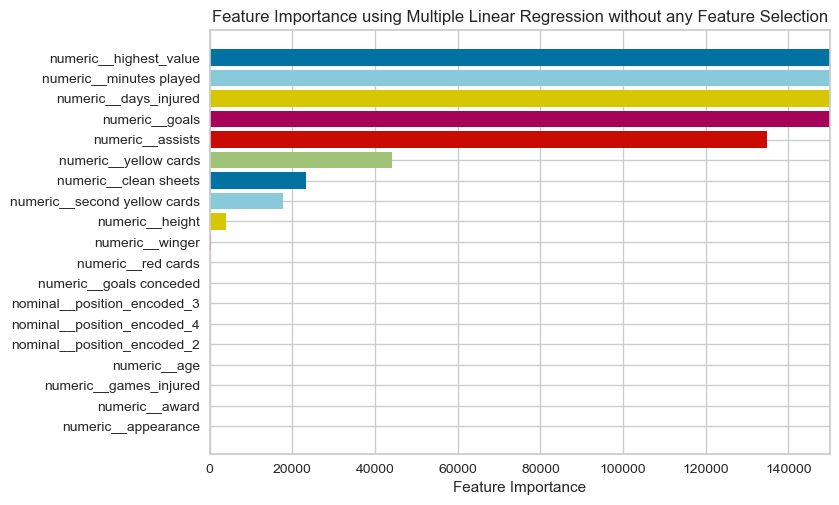

In [29]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 8]

from yellowbrick.model_selection import FeatureImportances

fig, ax = plt.subplots()

viz = FeatureImportances(estimator1, relative=False, ax = ax)
viz.fit(X_train_transformed, y_train)
viz.ax.set_xlim((0,150000))
viz.ax.set_title("Feature Importance using Multiple Linear Regression without any Feature Selection")
viz.ax.set_xlabel("Feature Importance")
plt.show();

**As seen in the graphic, the most important features for this model are: highest_value, minutes played, days_injured, goals, assists, yellow cards, clean sheets, second yellow cards, height, winger**

**Multiple Linear Regression with Feature Selection**

In [30]:
estimator2 = LinearRegression()

estimator2.fit(optimum_features_X_train, y_train)

LinearRegression()

In [31]:
# Calcualte thetas
print(estimator2.coef_)

[-1071693.26432079 -1516800.48578255   148102.98853223   -21240.09405631
  -169990.13570763    33497.89807192  2469842.33763653   764065.51413967
 -1182188.98645438 -1227859.22877763  8304321.02215649  -258637.43830627]


In [32]:
# Calcualte theta0
print(estimator2.intercept_)

3697817.3937105453


In [33]:
X_train_predicted2 = estimator2.predict(optimum_features_X_train)

X_test_predicted2 = estimator2.predict(optimum_features_X_test)

In [34]:
print('Train R2: %.6f'% r2_score(y_train, X_train_predicted2))
print('Test R2: %.6f'% r2_score(y_test, X_test_predicted2))

Train R2: 0.758491
Test R2: 0.716386


In [35]:
train_r2_values.append(r2_score(y_train, X_train_predicted2))

test_r2_values.append(r2_score(y_test, X_test_predicted2))

model_names.append("Multiple Linear Regression with Feature Selection")

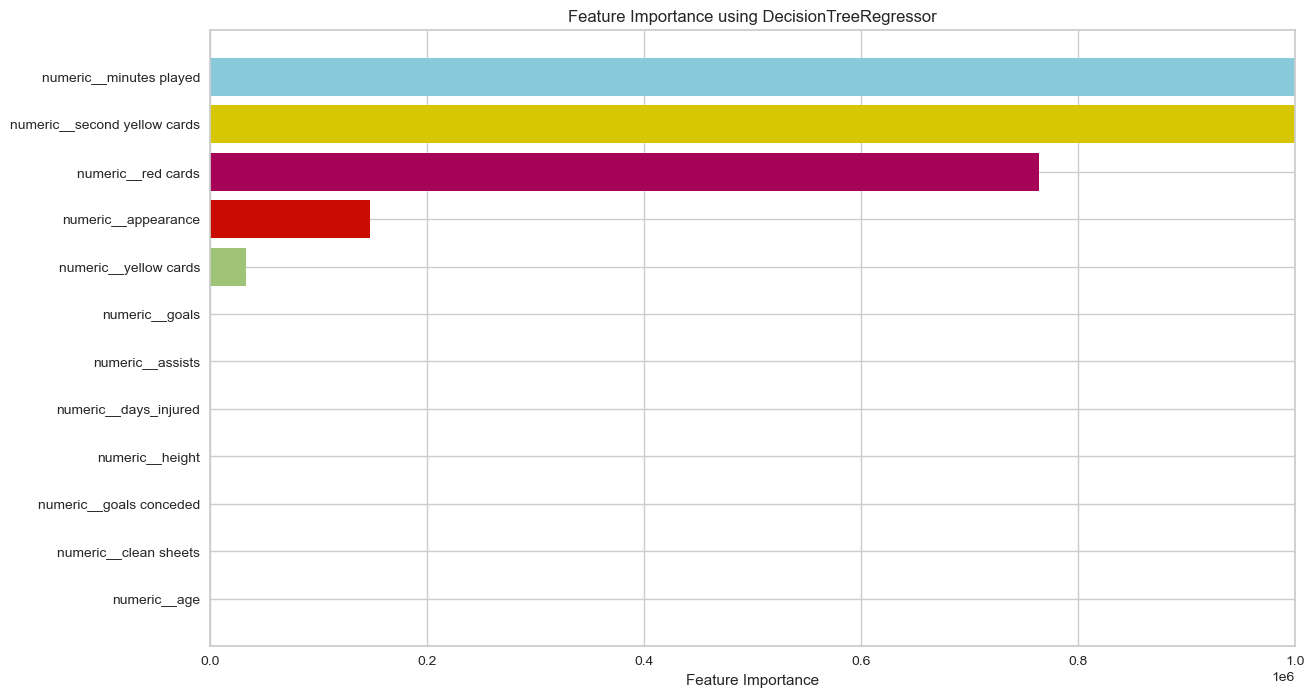

In [36]:
#visualize the importance of features
plt.rcParams['figure.figsize'] = [14, 8]

fig, ax = plt.subplots()

viz = FeatureImportances(estimator2, relative=False, ax = ax) #
viz.fit(X_train_transformed, y_train)
viz.ax.set_xlim((0,1000000))
viz.ax.set_title("Feature Importance using DecisionTreeRegressor")
viz.ax.set_xlabel("Feature Importance")
plt.show();

**As seen in the graphic, the most important features for this model are: minutes played, second yellow cards, red cards, appearance, yellow cards**

**Ridge Regression**

In [37]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV

ridge = Ridge()

# defining of possible values for lambda

param_grid = {'alpha' : np.linspace(0.001, 0.01, 1000)} #dictionary_key_value: estimator name-double underscore-hyperparameter name

#create the indices for 5-fold cv
kcv_index = KFold(n_splits=5, shuffle=True, random_state=1773)
    
#instantiate GridSearchCV with ridge_pipe
estimator3 = GridSearchCV(estimator = ridge, param_grid = param_grid, scoring='r2', cv=kcv_index, return_train_score=True)

In [38]:
#first it searches for the best lambda, then re-fit the model with best lambda and return the coefficients
estimator3.fit(X_train_transformed, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1773, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': array([0.001     , 0.00100901, 0.00101802, 0.00102703, 0.00103604,
       0.00104505, 0.00105405, 0.00106306, 0.00107207, 0.00108108,
       0.00109009, 0.0010991 , 0.00110811, 0.00111712, 0.00112613,
       0.00113514, 0.00114414, 0.00115315, 0.00116216, 0.00117117,
       0.00118018, 0.00118919, 0.00...
       0.00973874, 0.00974775, 0.00975676, 0.00976577, 0.00977477,
       0.00978378, 0.00979279, 0.0098018 , 0.00981081, 0.00981982,
       0.00982883, 0.00983784, 0.00984685, 0.00985586, 0.00986486,
       0.00987387, 0.00988288, 0.00989189, 0.0099009 , 0.00990991,
       0.00991892, 0.00992793, 0.00993694, 0.00994595, 0.00995495,
       0.00996396, 0.00997297, 0.00998198, 0.00999099, 0.01      ])},
             return_train_score=True, scoring='r2')

In [39]:
#you can investigate validation error in each 5 fold for a given alpha
#here test score = validation score
pd.DataFrame(estimator3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012146,0.005449,0.004021,0.002643,0.001,{'alpha': 0.001},0.681596,0.740582,0.79047,0.769125,...,0.753489,0.039957,1000,0.775907,0.762847,0.750262,0.755878,0.751667,0.759312,0.009381
1,0.009479,0.002299,0.006710,0.001421,0.001009,{'alpha': 0.001009009009009009},0.681596,0.740582,0.79047,0.769125,...,0.753489,0.039957,999,0.775907,0.762847,0.750262,0.755878,0.751667,0.759312,0.009381
2,0.010659,0.002844,0.005959,0.001641,0.001018,{'alpha': 0.001018018018018018},0.681596,0.740582,0.79047,0.769125,...,0.753489,0.039957,998,0.775907,0.762847,0.750262,0.755878,0.751667,0.759312,0.009381
3,0.010199,0.002154,0.006061,0.001364,0.001027,{'alpha': 0.0010270270270270271},0.681596,0.740582,0.79047,0.769125,...,0.753489,0.039957,997,0.775907,0.762847,0.750262,0.755878,0.751667,0.759312,0.009381
4,0.007787,0.003515,0.002869,0.002475,0.001036,{'alpha': 0.001036036036036036},0.681596,0.740582,0.79047,0.769125,...,0.753489,0.039957,996,0.775907,0.762847,0.750262,0.755878,0.751667,0.759312,0.009381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.005409,0.006655,0.003831,0.007663,0.009964,{'alpha': 0.009963963963963963},0.681597,0.740582,0.79047,0.769125,...,0.753489,0.039957,5,0.775907,0.762847,0.750262,0.755878,0.751667,0.759312,0.009381
996,0.013844,0.002735,0.003192,0.003304,0.009973,{'alpha': 0.009972972972972973},0.681597,0.740582,0.79047,0.769125,...,0.753489,0.039957,4,0.775907,0.762847,0.750262,0.755878,0.751667,0.759312,0.009381
997,0.011028,0.002571,0.006514,0.001427,0.009982,{'alpha': 0.009981981981981983},0.681597,0.740582,0.79047,0.769125,...,0.753489,0.039957,3,0.775907,0.762847,0.750262,0.755878,0.751667,0.759312,0.009381
998,0.011975,0.003192,0.005981,0.000931,0.009991,{'alpha': 0.009990990990990992},0.681597,0.740582,0.79047,0.769125,...,0.753489,0.039957,2,0.775907,0.762847,0.750262,0.755878,0.751667,0.759312,0.009381


In [40]:
#mean train score:cross validated train score, mean test score: cross validated validation score
pd.DataFrame(estimator3.cv_results_)[["param_alpha","mean_train_score","mean_test_score"]]

,param_alpha,mean_train_score,mean_test_score
0,0.001,0.759312,0.753489
1,0.001009,0.759312,0.753489
2,0.001018,0.759312,0.753489
3,0.001027,0.759312,0.753489
4,0.001036,0.759312,0.753489
...,...,...,...
995,0.009964,0.759312,0.753489
996,0.009973,0.759312,0.753489
997,0.009982,0.759312,0.753489
998,0.009991,0.759312,0.753489


In [41]:
#Parameter setting that gave the best results on the validation data.
print("Optimum λ:", estimator3.best_params_)

Optimum λ: {'alpha': 0.01}


In [42]:
#print the best estimator
estimator3.best_estimator_

Ridge(alpha=0.01)

In [43]:
#Mean cross-validated score of the best_estimator
print("CV R^2_Val:%.4f" % (estimator3.best_score_))

CV R^2_Val:0.7535


In [44]:
#print the best model's coefficients
print("Coef names:", estimator3.best_estimator_.feature_names_in_)
print("Coef values:", estimator3.best_estimator_.coef_)

Coef names: ['numeric__height' 'numeric__age' 'numeric__appearance' 'numeric__goals'
 'numeric__assists' 'numeric__yellow cards' 'numeric__second yellow cards'
 'numeric__red cards' 'numeric__goals conceded' 'numeric__clean sheets'
 'numeric__minutes played' 'numeric__days_injured'
 'numeric__games_injured' 'numeric__award' 'numeric__highest_value'
 'numeric__winger' 'nominal__position_encoded_2'
 'nominal__position_encoded_3' 'nominal__position_encoded_4']
Coef values: [ 4.01534145e+03 -1.06998864e+06 -1.54290553e+06  1.95704392e+05
  1.34793436e+05  4.41835235e+04  1.77211136e+04 -1.79982940e+04
 -2.25221159e+05  2.31794363e+04  2.49337372e+06  7.53048483e+05
 -1.17204663e+06 -1.24054919e+06  8.29740767e+06  3.09949382e+02
 -5.04163735e+05 -3.64578173e+05 -3.67552144e+05]


In [45]:
print("R2 on train data: %.4f" % estimator3.best_estimator_.score(X_train_transformed, y_train))
print("R2 on test data: %.4f" % estimator3.best_estimator_.score(X_test_transformed, y_test))

R2 on train data: 0.7589
R2 on test data: 0.7167


In [46]:
train_r2_values.append(estimator3.best_estimator_.score(X_train_transformed, y_train))

test_r2_values.append(estimator3.best_estimator_.score(X_test_transformed, y_test))

model_names.append("Ridge Regression")

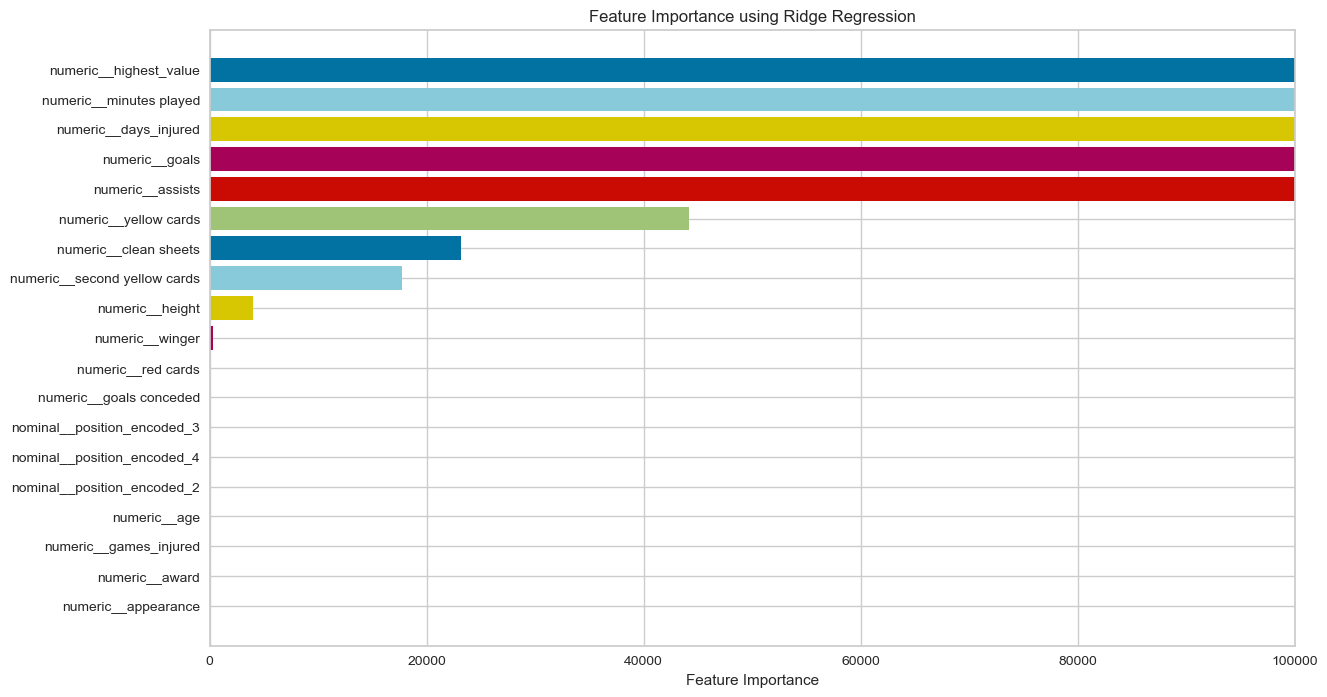

In [47]:
#visualize the importance of features
plt.rcParams['figure.figsize'] = [14, 8]

fig, ax = plt.subplots()

viz = FeatureImportances(estimator3.best_estimator_, relative=False, ax = ax)
viz.fit(X_train_transformed, y_train)
viz.ax.set_xlim((0,100000))
viz.ax.set_title("Feature Importance using Ridge Regression")
viz.ax.set_xlabel("Feature Importance")
plt.show();

**Lasso Regression**

In [48]:
from sklearn.linear_model import Lasso

lasso = Lasso()

#create a vector of possible values for lambda
param_grid = {'alpha' : np.linspace(0.01,0.5,100)}

#create the indices for 5-fold
kcv_index = KFold(n_splits=5, shuffle=True, random_state=1773)
    
#instantiate GridSearchCV with ridge_pipe
estimator4 = GridSearchCV(estimator = lasso, param_grid = param_grid, scoring='r2', cv=kcv_index, return_train_score=True) 

In [49]:
estimator4.fit(X_train_transformed, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1773, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': array([0.01      , 0.01494949, 0.01989899, 0.02484848, 0.02979798,
       0.03474747, 0.03969697, 0.04464646, 0.04959596, 0.05454545,
       0.05949495, 0.06444444, 0.06939394, 0.07434343, 0.07929293,
       0.08424242, 0.08919192, 0.09414141, 0.09909091, 0.1040404 ,
       0.1089899 , 0.11393939, 0.1188...
       0.35646465, 0.36141414, 0.36636364, 0.37131313, 0.37626263,
       0.38121212, 0.38616162, 0.39111111, 0.39606061, 0.4010101 ,
       0.4059596 , 0.41090909, 0.41585859, 0.42080808, 0.42575758,
       0.43070707, 0.43565657, 0.44060606, 0.44555556, 0.45050505,
       0.45545455, 0.46040404, 0.46535354, 0.47030303, 0.47525253,
       0.48020202, 0.48515152, 0.49010101, 0.49505051, 0.5       ])},
             return_train_score=True, scoring='r2')

In [50]:
#Parameter setting that gave the best results on the validation data.
print("Optimum λ:", estimator4.best_params_)

Optimum λ: {'alpha': 0.5}


In [51]:
#Mean cross-validated R2 score of the best_estimator
print("CV R^2_Val:%.4f" % (estimator4.best_score_)) #a very small data set. for that reason, there may be such inconsistiencies.

CV R^2_Val:0.7535


In [52]:
#print the re-trained model's (best model's) coefficients
print("Coef names:", estimator4.best_estimator_.feature_names_in_)
print("Cef values:", estimator4.best_estimator_.coef_)

Coef names: ['numeric__height' 'numeric__age' 'numeric__appearance' 'numeric__goals'
 'numeric__assists' 'numeric__yellow cards' 'numeric__second yellow cards'
 'numeric__red cards' 'numeric__goals conceded' 'numeric__clean sheets'
 'numeric__minutes played' 'numeric__days_injured'
 'numeric__games_injured' 'numeric__award' 'numeric__highest_value'
 'numeric__winger' 'nominal__position_encoded_2'
 'nominal__position_encoded_3' 'nominal__position_encoded_4']
Cef values: [ 4.01432397e+03 -1.06998783e+06 -1.54295347e+06  1.95704178e+05
  1.34793154e+05  4.41832681e+04  1.77207307e+04 -1.79979714e+04
 -2.25220699e+05  2.31791729e+04  2.49341715e+06  7.53063490e+05
 -1.17206280e+06 -1.24055631e+06  8.29742359e+06  3.10234389e+02
 -5.04154880e+05 -3.64561451e+05 -3.67530268e+05]


In [53]:
print("R2 on train+val data: %.6f" % estimator4.score(X_train_transformed, y_train))
print("R2 on test data: %.6f" % estimator4.score(X_test_transformed, y_test))

R2 on train+val data: 0.758906
R2 on test data: 0.716696


In [54]:
train_r2_values.append(estimator4.best_estimator_.score(X_train_transformed, y_train))

test_r2_values.append(estimator4.best_estimator_.score(X_test_transformed, y_test))

model_names.append("Lasso Regression")

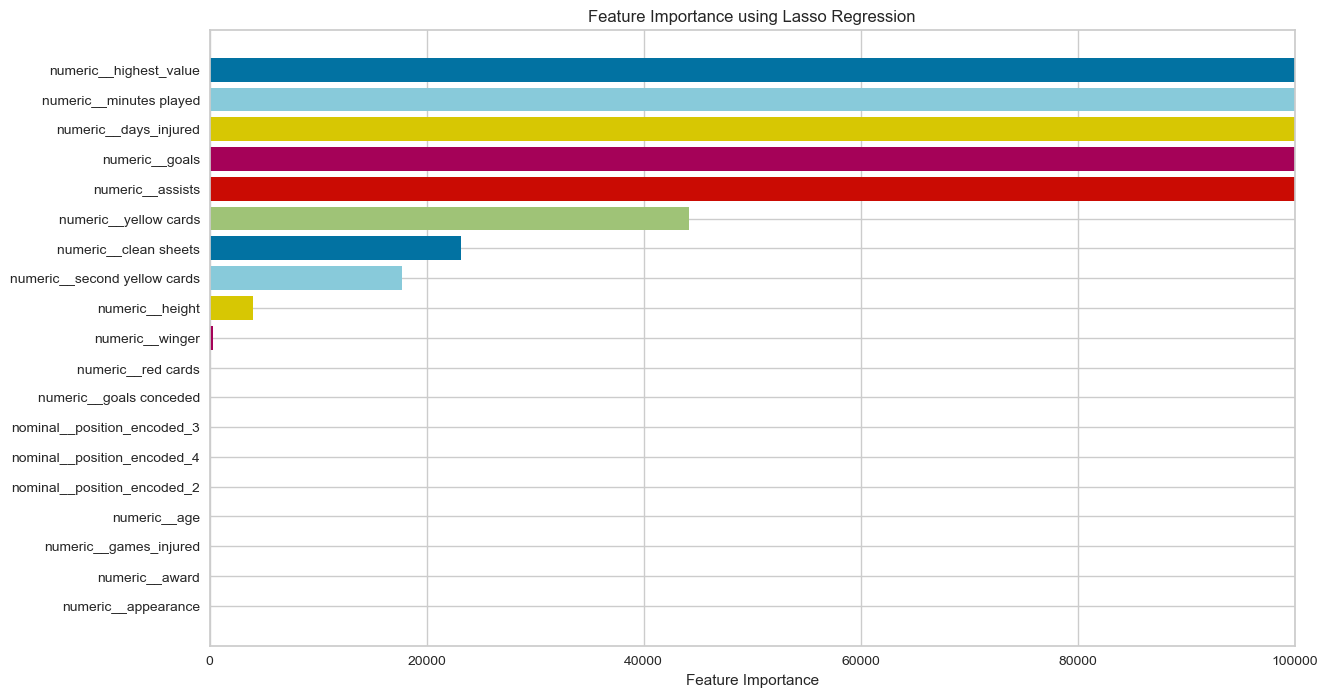

In [55]:
#visualize the importance of features
plt.rcParams['figure.figsize'] = [14, 8]

fig, ax = plt.subplots()

viz = FeatureImportances(estimator3.best_estimator_, relative=False, ax = ax) #
viz.fit(X_train_transformed, y_train)
viz.ax.set_xlim((0,100000))
viz.ax.set_title("Feature Importance using Lasso Regression")
viz.ax.set_xlabel("Feature Importance")
plt.show();

**Decision Tree Regression**

In [56]:
# multiple hyper-parameter tuning with GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree_dt = DecisionTreeRegressor(random_state=1773)

# hyper-parameters ranges
param_grid_dt = {'max_depth': list(range(1, 6)),
                 'max_leaf_nodes': list(range(5, 9)),
                 'min_samples_split': list(range(6, 10)),
                 'min_samples_leaf': list(range(5, 9)),
              }

kcv_index_dt = KFold(n_splits=5, shuffle=True, random_state=1773)

estimator5 = GridSearchCV(estimator = tree_dt, 
                              param_grid= param_grid_dt,
                              scoring='r2', 
                              cv = kcv_index_dt)

In [57]:
# fitting the model for grid search cv
estimator5.fit(X_train_transformed, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1773, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=1773),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_leaf_nodes': [5, 6, 7, 8],
                         'min_samples_leaf': [5, 6, 7, 8],
                         'min_samples_split': [6, 7, 8, 9]},
             scoring='r2')

In [58]:
#best DecisionTreeRegressor on validation
estimator5.best_estimator_

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=8, min_samples_leaf=8,
                      min_samples_split=6, random_state=1773)

In [59]:
#Evaluate performance of best DecisionTreeRegressor on the train set
print("R2 on trainbig data: %.2f %%" % (estimator5.best_estimator_.score(X_train_transformed, y_train)*100))

#Evaluate performance of best DecisionTreeRegressor on test set
print("R2 on test data: %.2f %%" % (estimator5.best_estimator_.score(X_test_transformed, y_test)*100))

R2 on trainbig data: 78.14 %
R2 on test data: 74.45 %


In [60]:
train_r2_values.append(estimator5.best_estimator_.score(X_train_transformed, y_train))

test_r2_values.append(estimator5.best_estimator_.score(X_test_transformed, y_test))

model_names.append("Decision Tree Regression")

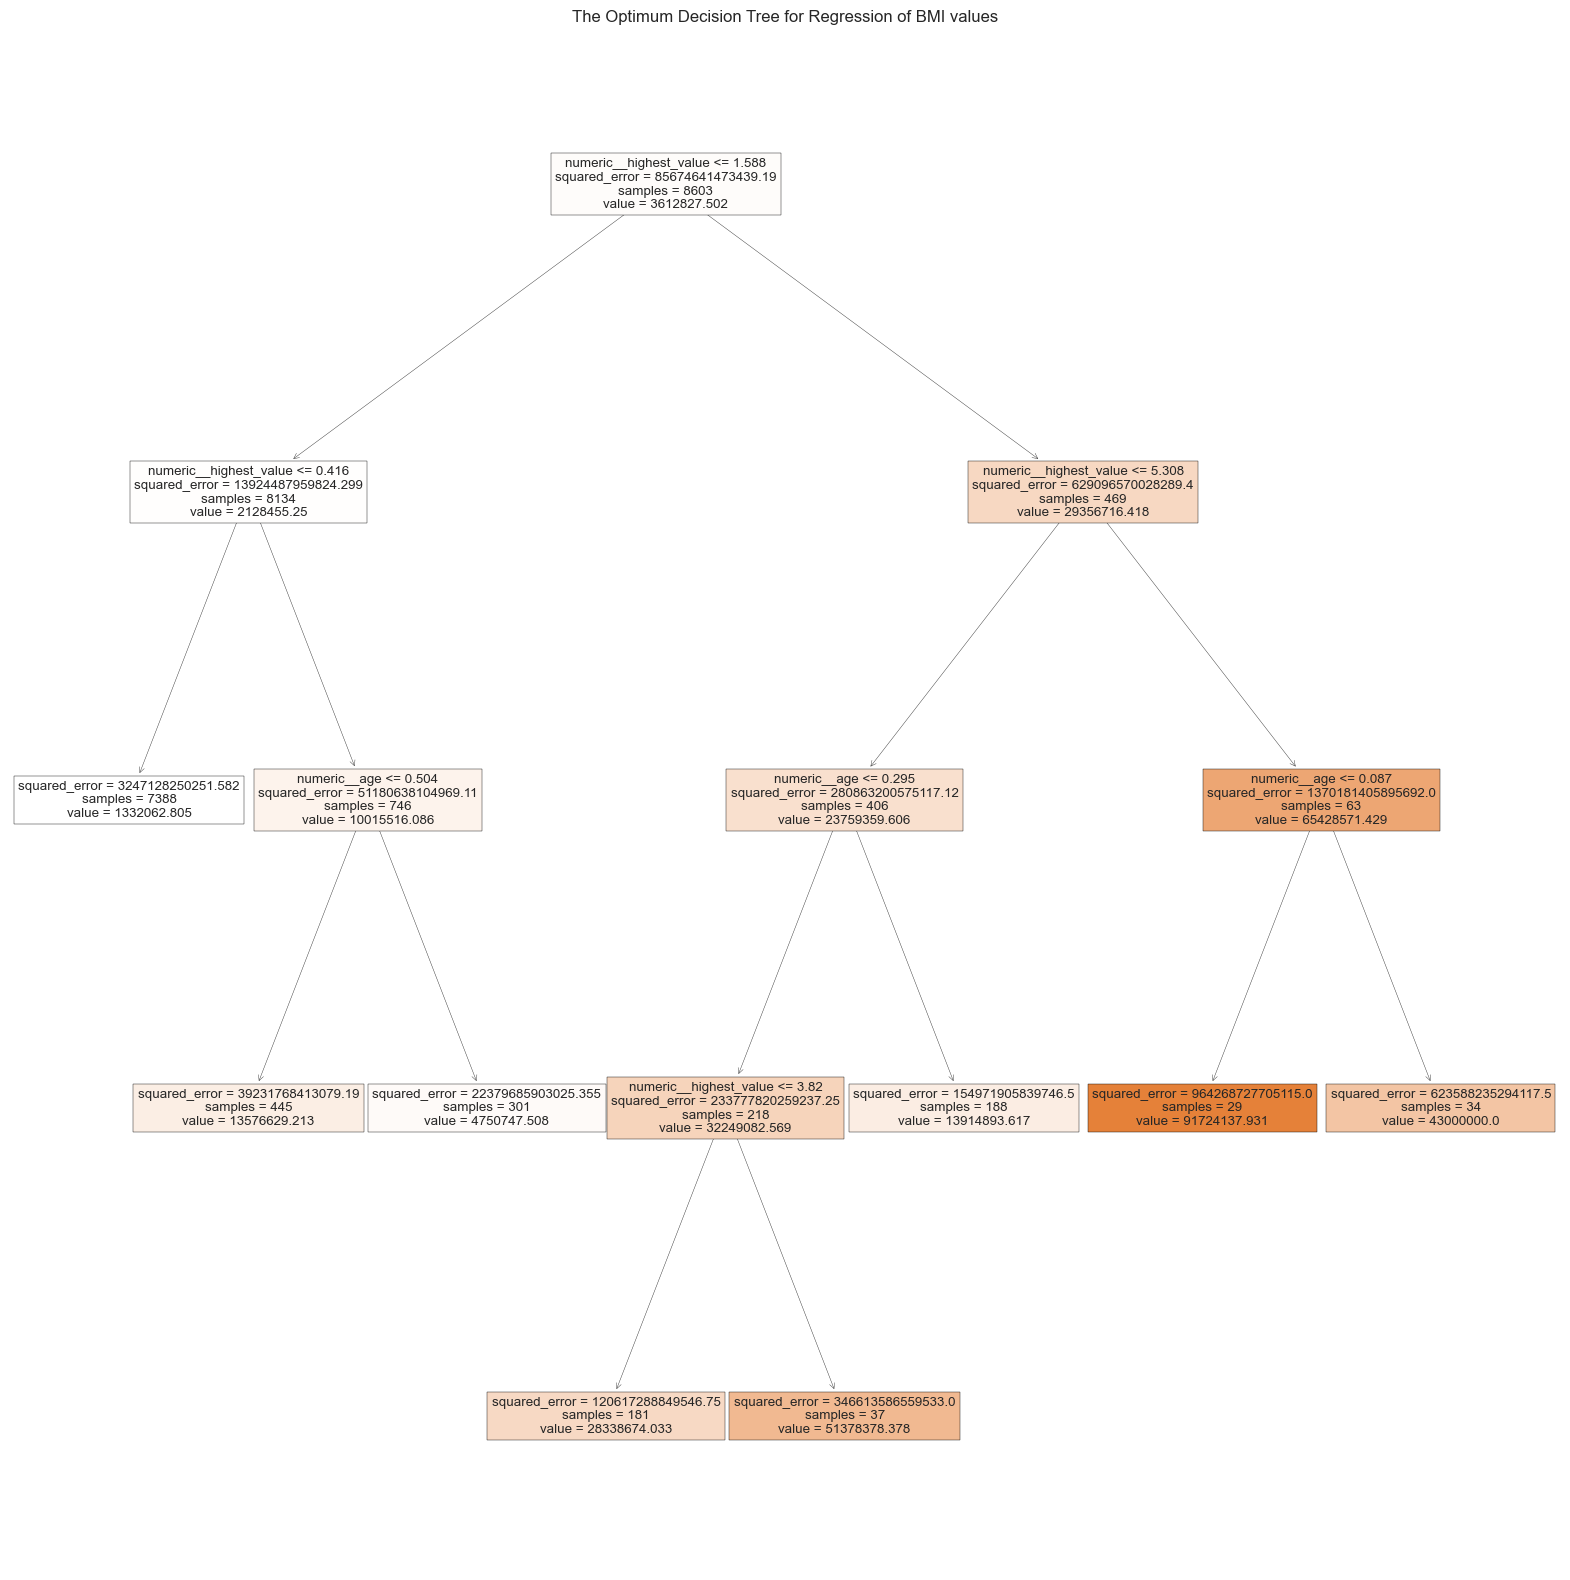

In [61]:
plt.rcParams['figure.figsize'] = [20, 20]

from sklearn.tree import plot_tree

fig, ax = plt.subplots()

tree_plot = plot_tree(estimator5.best_estimator_, 
                      feature_names=X_train_transformed.columns.tolist(),
                      class_names=estimator5.best_estimator_.feature_names_in_.tolist(),
                      ax=ax, 
                      filled=True)

plt.title("The Optimum Decision Tree for Regression of BMI values")
plt.show();

In [62]:
print(estimator5.best_estimator_.feature_names_in_)
print(estimator5.best_estimator_.feature_importances_)

['numeric__height' 'numeric__age' 'numeric__appearance' 'numeric__goals'
 'numeric__assists' 'numeric__yellow cards' 'numeric__second yellow cards'
 'numeric__red cards' 'numeric__goals conceded' 'numeric__clean sheets'
 'numeric__minutes played' 'numeric__days_injured'
 'numeric__games_injured' 'numeric__award' 'numeric__highest_value'
 'numeric__winger' 'nominal__position_encoded_2'
 'nominal__position_encoded_3' 'nominal__position_encoded_4']
[0.         0.14771925 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.85228075 0.         0.         0.
 0.        ]


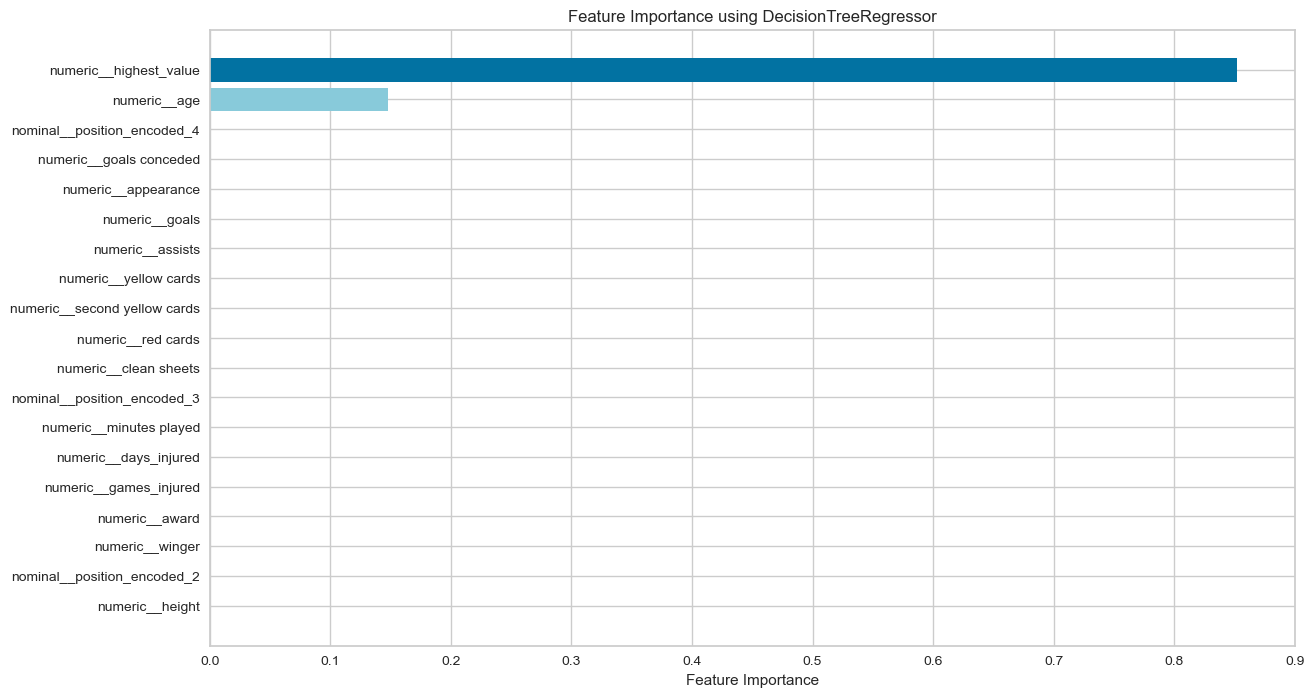

In [63]:
plt.rcParams['figure.figsize'] = [14, 8]

fig, ax = plt.subplots()

viz = FeatureImportances(estimator5.best_estimator_, relative=False, ax = ax)
viz.fit(X_train_transformed, y_train)
viz.ax.set_xlim((0,0.9))
viz.ax.set_title("Feature Importance using DecisionTreeRegressor")
viz.ax.set_xlabel("Feature Importance")
plt.show();

**Random Forest Regression** 

In [64]:
#multiple hyper-parameter tuning with GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=1773)

# hyper-parameters ranges
param_grid_rf = {'n_estimators': list(range(1, 7)),
                 'max_depth': list(range(1, 7)),
                 'max_features': list(range(1, 7))}

kcv_index_rf = KFold(n_splits=5, shuffle=True, random_state=2001) 

estimator6 = GridSearchCV(estimator = rf, 
                           param_grid= param_grid_rf, 
                           cv = kcv_index_rf)

In [65]:
# fitting the model for grid search cv
estimator6.fit(X_train_transformed, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=2001, shuffle=True),
             estimator=RandomForestRegressor(random_state=1773),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [1, 2, 3, 4, 5, 6]})

In [66]:
#best RandomRegressor on validation
estimator6.best_estimator_

RandomForestRegressor(max_depth=6, max_features=6, n_estimators=6,
                      random_state=1773)

In [67]:
print("Train Accuracy: %.6f %%" % (estimator6.best_estimator_.score(X_train_transformed, y_train)*100))
print("Test Accuracy: %.6f %%" % (estimator6.best_estimator_.score(X_test_transformed, y_test)*100))

Train Accuracy: 86.300235 %
Test Accuracy: 80.503491 %


In [68]:
train_r2_values.append(estimator6.best_estimator_.score(X_train_transformed, y_train))

test_r2_values.append(estimator6.best_estimator_.score(X_test_transformed, y_test))

model_names.append("Random Forest Regression")

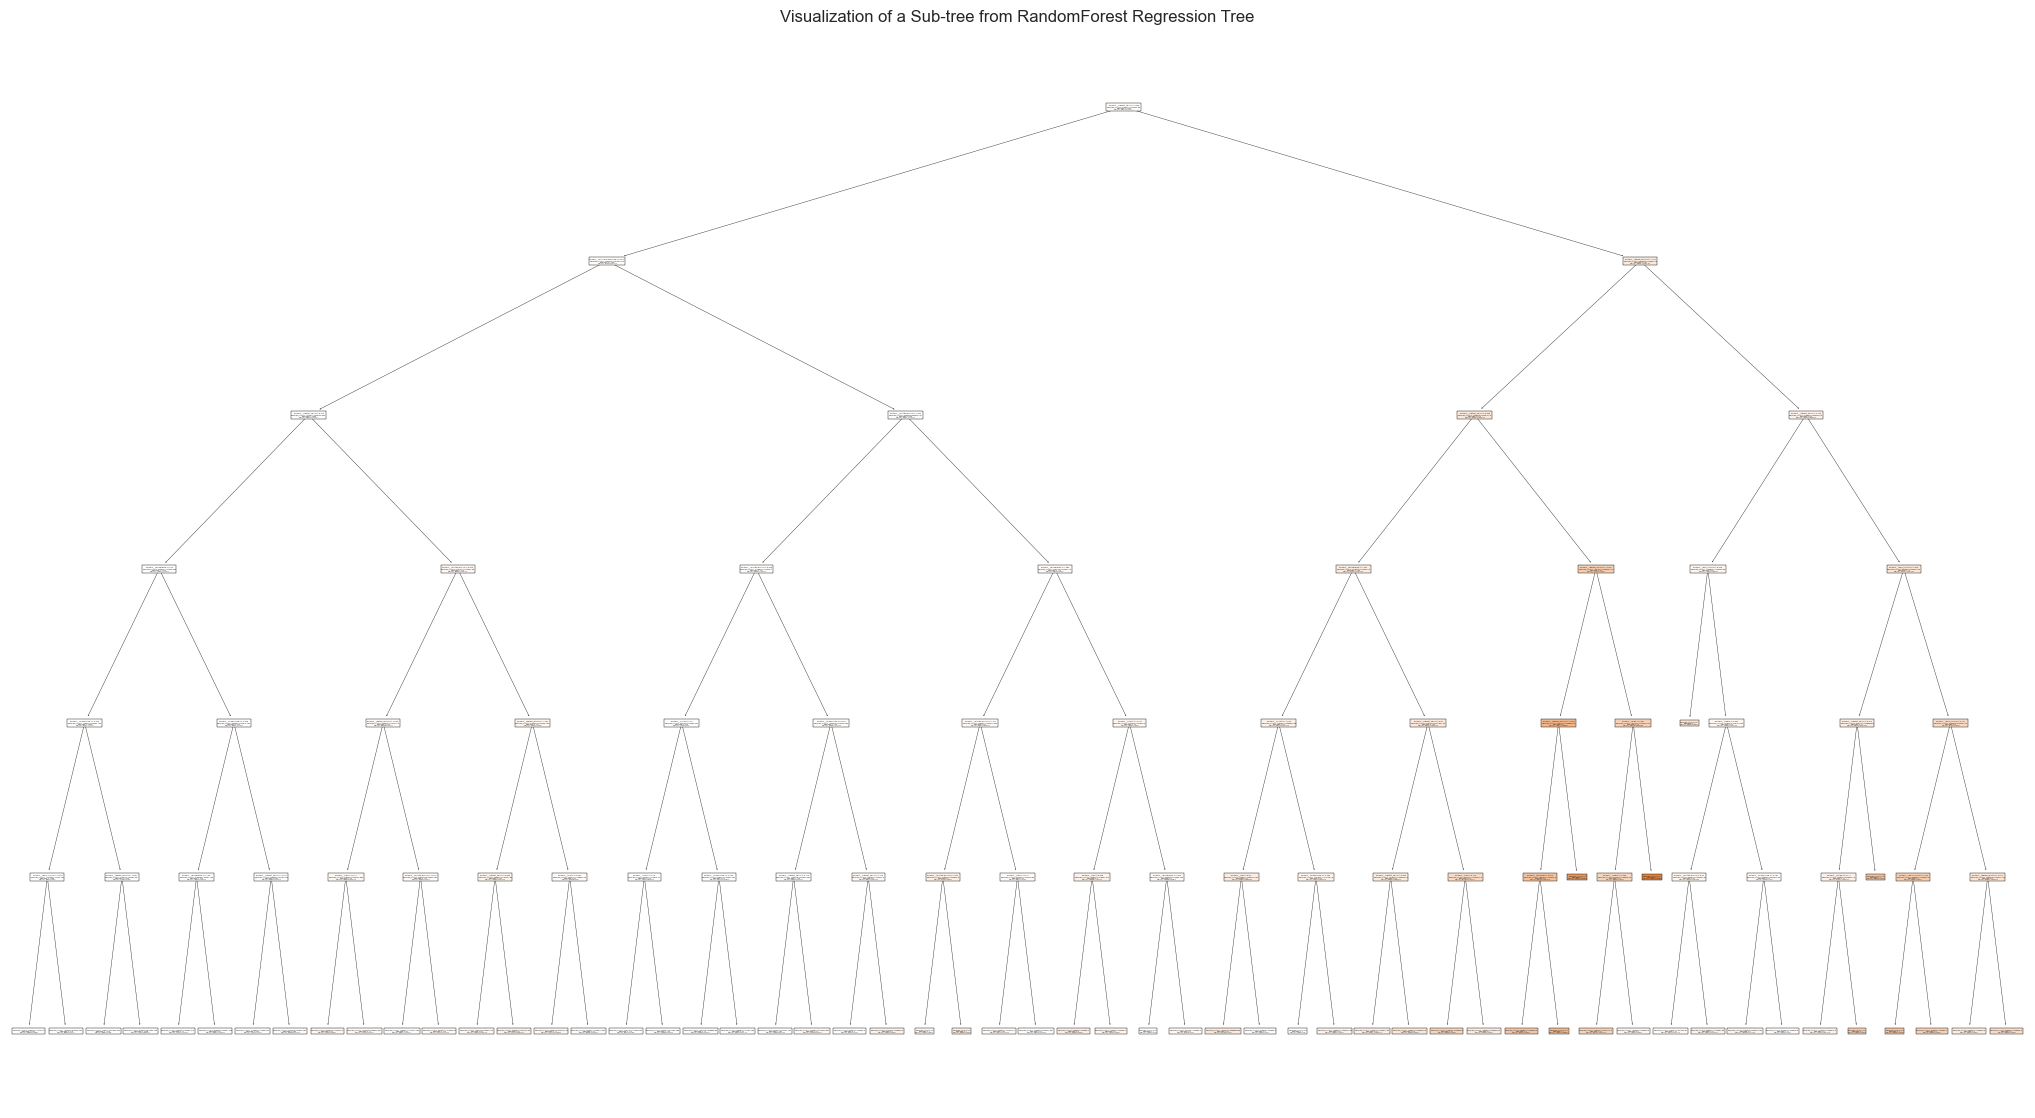

In [69]:
#visualize the sub-tree
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [26, 14]

from sklearn.tree import plot_tree

fig, ax = plt.subplots()

tree_plot = plot_tree(estimator6.best_estimator_[1],
                      feature_names=X_train_transformed.columns.tolist(), 
                      class_names=estimator6.best_estimator_.feature_names_in_.tolist(),
                      ax=ax, 
                      filled=True)
plt.title("Visualization of a Sub-tree from RandomForest Regression Tree")
plt.show();

In [70]:
print(estimator6.best_estimator_.feature_names_in_)
print(estimator6.best_estimator_.feature_importances_)

['numeric__height' 'numeric__age' 'numeric__appearance' 'numeric__goals'
 'numeric__assists' 'numeric__yellow cards' 'numeric__second yellow cards'
 'numeric__red cards' 'numeric__goals conceded' 'numeric__clean sheets'
 'numeric__minutes played' 'numeric__days_injured'
 'numeric__games_injured' 'numeric__award' 'numeric__highest_value'
 'numeric__winger' 'nominal__position_encoded_2'
 'nominal__position_encoded_3' 'nominal__position_encoded_4']
[1.07185340e-03 6.23193093e-02 1.05164103e-01 5.65161881e-02
 1.86489668e-02 6.89783611e-03 1.68632778e-03 1.13273574e-04
 2.48296465e-04 4.67035361e-05 8.27099112e-02 1.46217002e-02
 4.13072133e-02 4.42823192e-02 5.61861526e-01 1.97414863e-03
 1.99198764e-04 0.00000000e+00 3.31124533e-04]


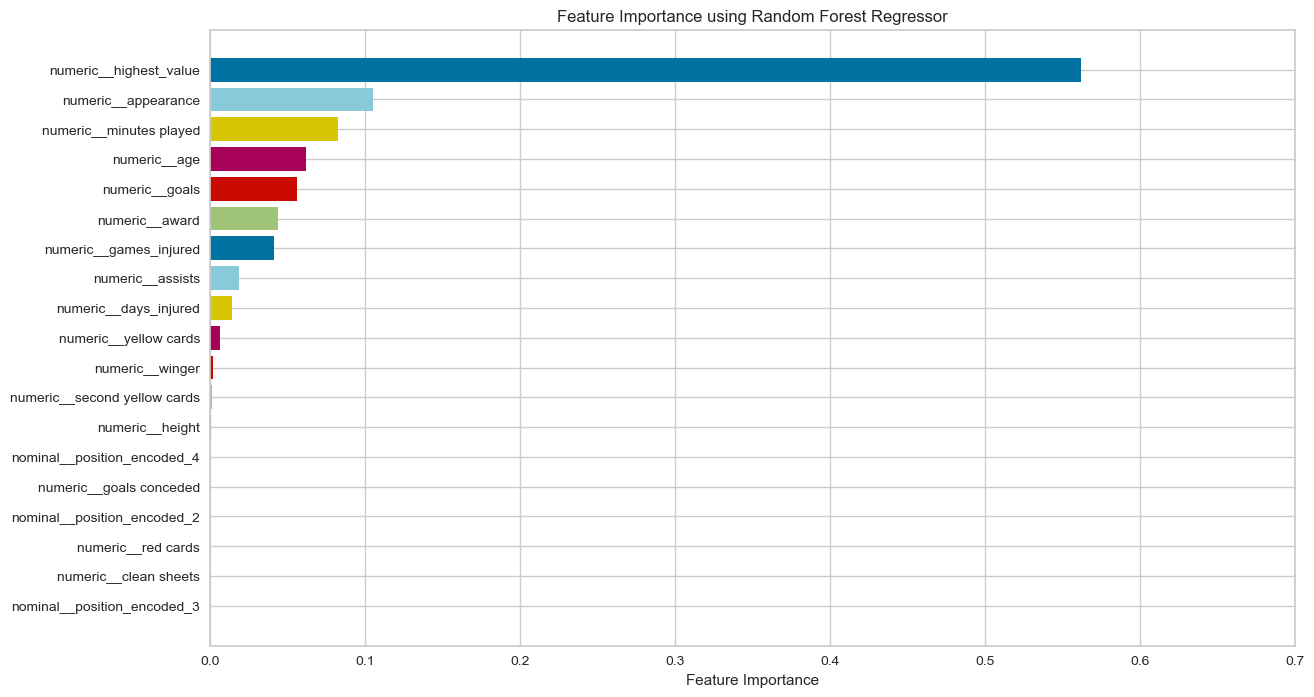

In [71]:
#visualize the importance of features
plt.rcParams['figure.figsize'] = [14, 8]

fig, ax = plt.subplots()

viz = FeatureImportances(estimator6.best_estimator_, relative=False, ax = ax)
viz.fit(X_train_transformed, y_train)
viz.ax.set_xlim((0,0.7))
viz.ax.set_title("Feature Importance using Random Forest Regressor")
viz.ax.set_xlabel("Feature Importance")
plt.show();

## Results

In [72]:
evaluation = pd.DataFrame()

evaluation["Models"] = model_names
evaluation = evaluation.set_index('Models', drop=True)

evaluation["Train R2 Values"] = train_r2_values
evaluation["Test R2 Values"] = test_r2_values

evaluation.sort_values(by="Test R2 Values", ascending=False, inplace=True)
evaluation

,Train R2 Values,Test R2 Values
Models,,
Random Forest Regression,0.863002,0.805035
Decision Tree Regression,0.781373,0.744492
Ridge Regression,0.758906,0.716696
Multiple Linear Regression without any Feature Selection,0.758906,0.716696
Lasso Regression,0.758906,0.716696
Multiple Linear Regression with Feature Selection,0.758491,0.716386


In [73]:
evaluation

,Train R2 Values,Test R2 Values
Models,,
Random Forest Regression,0.863002,0.805035
Decision Tree Regression,0.781373,0.744492
Ridge Regression,0.758906,0.716696
Multiple Linear Regression without any Feature Selection,0.758906,0.716696
Lasso Regression,0.758906,0.716696
Multiple Linear Regression with Feature Selection,0.758491,0.716386


In [74]:
data_new = { 'current_value' : 35000000,
             'player' : 'a',
             'team'   : 'Inter',
             'name'   : 'Hakan Calhanoglu',
             'position' :'midfield',
             'height'   :178,
             'age'   : 29,
             'appearance ' : 95,
             'goals'   : 0.157,
             'asists'   : 0.275,
             'yellow cards' : 0.21,
             'second yellow cards' : 0,
             'red cards'   : 0,
             'goals conceded' : 0,
             'clean sheets'   :0,
             'minutes played'   : 6860,
             'days_injured' : 40,
             'games_injured'   : 10,
             'award'   : 7,
             'highest_value '   :35000000,
             'position_encoded '   : 3,
             'winger' : 0,
             }

df = pd.DataFrame()

df[X.columns.to_list()] = [[178,29,95,0.157,0.257,0.21,0,0,0,0,6860,40,10,7,35000000,3,0]]
df

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,highest_value,position_encoded,winger
0,178.0,29.0,95.0,0.157,0.257,0.21,0.0,0.0,0.0,0.0,6860.0,40.0,10.0,7.0,35000000.0,3.0,0.0


In [75]:
df = pipe.named_steps["columntransformer"].transform(df)
df

,numeric__height,numeric__age,numeric__appearance,numeric__goals,numeric__assists,numeric__yellow cards,numeric__second yellow cards,numeric__red cards,numeric__goals conceded,numeric__clean sheets,numeric__minutes played,numeric__days_injured,numeric__games_injured,numeric__award,numeric__highest_value,numeric__winger,nominal__position_encoded_2,nominal__position_encoded_3,nominal__position_encoded_4
0,-0.465796,0.607941,2.211072,0.1301,1.141474,0.044751,-0.180163,-0.080426,-0.305291,-0.122453,2.173889,-0.451694,-0.256252,1.354605,2.145857,-0.666471,0.0,1.0,0.0


In [76]:
print("Prediction made with Random Forest Regressor model is", estimator6.best_estimator_.predict(df))

Prediction made with Random Forest Regressor model is [32726567.19791538]


**The highest R2 value was found in Random Forest Regression. Although there are several reasons for this, the most important one may be that the hyper-parameter values were obtained by selecting them from a more appropriate range. For example, if the hyper-parameters had been chosen in a more appropriate range in the Ridge, Lasso or Decision Tree models, a higher R2 value could have been obtained.**

## Conclusion

**In this project, it is aimed to create market value estimation models from the physical characteristics of football players, their performance data and the highest market value reached. 5 different prediction models were used and their performances were reported. The best predictive model was Random Forest Regressor with the 0.805035 R2 on the test set. The performances of other prediction models are also reported as dataframes.**

**In addition to estimating the market value, the resulting prediction models can also provide some information to the scouting teams of the teams. For example, according to our model, if the current market value of a football player with a market value of 20 million euros is 10 million euros, this player may be a good opportunity for transfer. Because according to our model, the potential of this player is expected to be 20 million euros, while the real value is 10 million euros, which indicates that this football player has the potential to debut. It also allows clubs to buy a player with potential for less than his value, which is always something clubs want.**

## References

[1] https://www.kaggle.com/datasets/khanghunhnguyntrng/football-players-transfer-fee-prediction-dataset/data

[2] https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

[3] https://www.transfermarkt.com.tr/hakan-calhanoglu/profil/spieler/126414

[4] https://github.com/MAT388E-Fall23/Lecture_Materials